<a href="https://colab.research.google.com/github/marianorviola/Python-Projects/blob/main/Titanic_dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Place the Google Drive Sharing link
file_share_link = "https://drive.google.com/file/d/1qwKqO7cEx2eBF74cOLlFlTzD7w-QDfhi/view?usp=sharing"

# extract the ID of the file
file_id = file_share_link[file_share_link.find("d/")+2 : file_share_link.find("/v")]
print(file_id)
!gdown "$file_id" # Download the data from Google Drive

1qwKqO7cEx2eBF74cOLlFlTzD7w-QDfhi
Downloading...
From: https://drive.google.com/uc?id=1qwKqO7cEx2eBF74cOLlFlTzD7w-QDfhi
To: /content/titanic.csv
100% 61.2k/61.2k [00:00<00:00, 63.1MB/s]


# This python project is an Exploratory Data Analysis (EDA) on the Titanic dataset. It attempts to predict the survival rate of the class of passengers who were on board the ship when it sank in the North Atlantic Ocean on April 15, 1912.

# Our Exploratory Data Analysis shows the results for the following categories:
- Sex (gender), 
- Pclass (Passenger class), 
- Age (Passenger Age) and 
- Embarked (Port of Embarcation)

## Summary of Results:

1. **Category 1 - Sex (Gender)**: Women had a better chance of survival than men. 
2. **Category 2 - Pclass**: Passengers in Class 1 had a higher survival rate than passengers in Class 2 and Class 3.
3. **Category 3 - Age**: children between age 5 to 10 had a higher chance of survival;
most passengers between the age of 15 to 35 did not survive, and 
as the age increases, the survival chances also decreases. We see the same pattern irrespective of the ticket (Pclass) that the passenger has purchased.
4. **Category 4 - Embarked**: C port had the highest survival rate because most passengers who boarded belonged to Pclass 1; S port had the lowest survival rate because most passengers who boarded belonged to Pclass 3.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use("fivethirtyeight")


In [ ]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() #check for null values in dataset


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


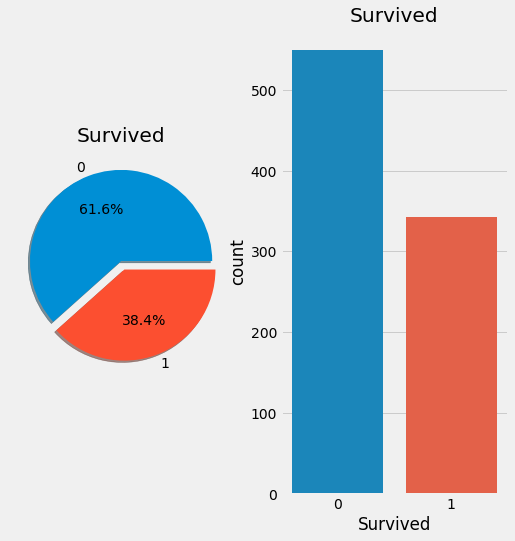

In [ ]:
f, ax = plt.subplots(1,2,figsize = (8,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")
sns.countplot("Survived",data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# We analyze the categorical column - Sex
in order to determine whether gender has any impact on survival.

In [ ]:
data.groupby(["Sex","Survived"])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


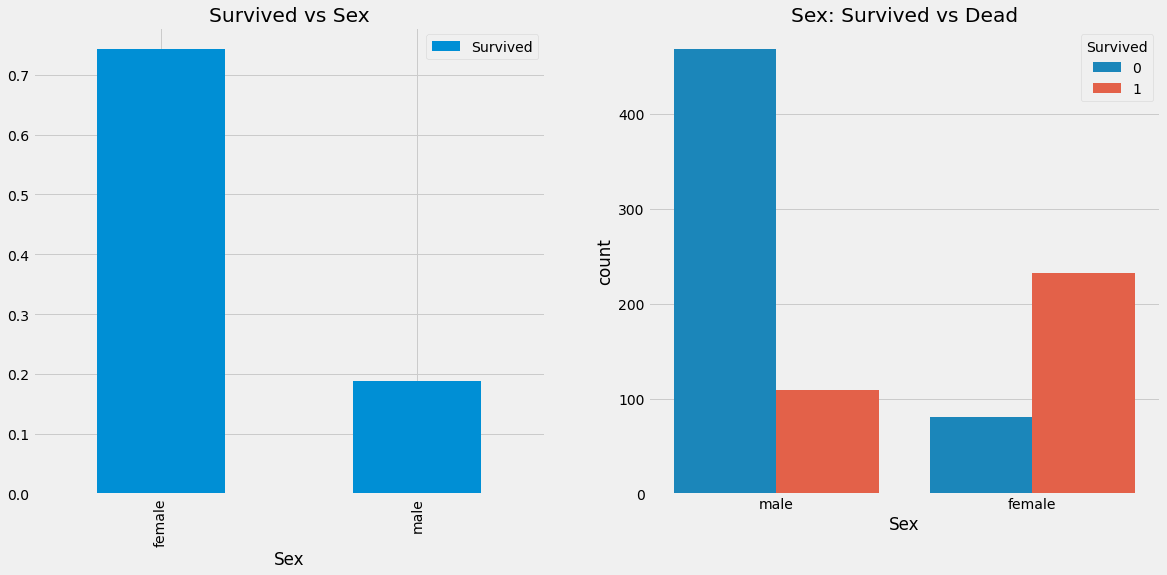

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot("Sex",hue="Survived",data = data,ax=ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()


Figure 1: The number of female passengers who survived were twice the number of male passengers who survived. 

# We analyze the Passenger Class (Pclass) column
to determine if PClass was a factor in survival.

In [ ]:
pd.crosstab(data['Pclass'],data['Survived'], margins = True)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


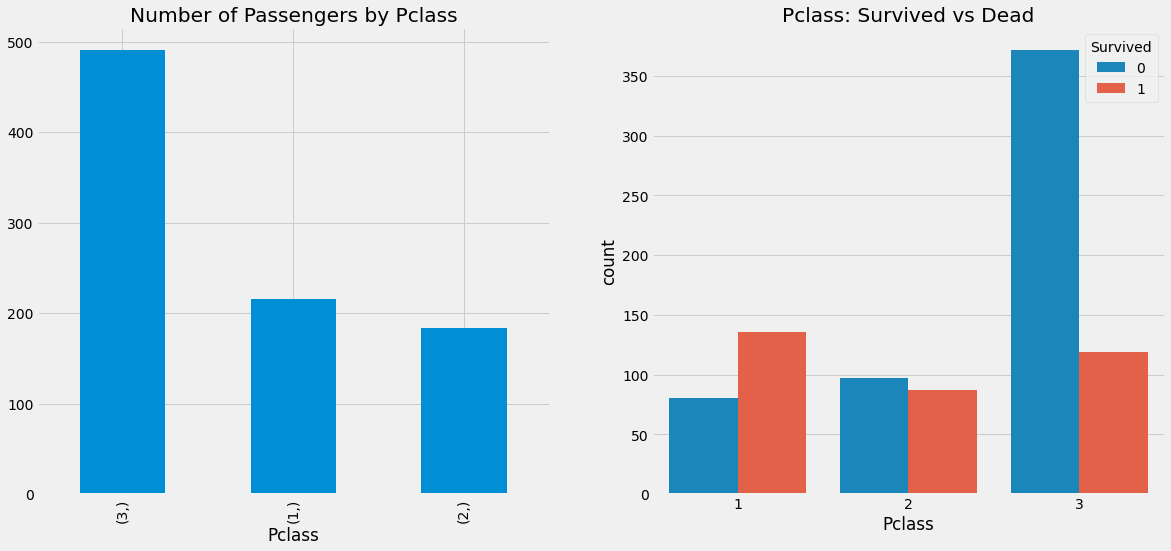

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data[['Pclass']].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of Passengers by Pclass")
sns.countplot("Pclass",hue="Survived",data = data,ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

Figure 2: It seems that first class passengers (Pclass1) were given more importance during the rescue operation. Money and social status seems
to have played an important role in overall survival.

In [ ]:
pd.crosstab([data['Sex'],data['Survived']], data['Pclass'], margins=True)


Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

Table 1: Female first class passengers had the highest overall chance of survival, while male passengers in third class had the lowest overall chance of survival.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


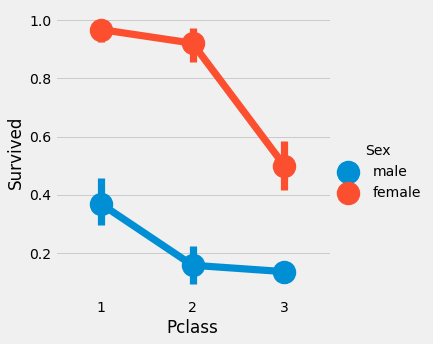

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)


Figure 3: The factor plot shows that the overall survival of women in first class was close to 100% while women in second class had an overall survival rate of around 90%. This shows that women were given priority over men during the rescue operation. Males in first class had a survival rate of around 40%. Figure 3 shows that both passenger class and gender are both important variables when predicting overall survival rates.

#We analyze the continous variable feature age.

In [ ]:
data["Age"].min(), data["Age"].max(), data["Age"].mean()


(0.42, 80.0, 29.69911764705882)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


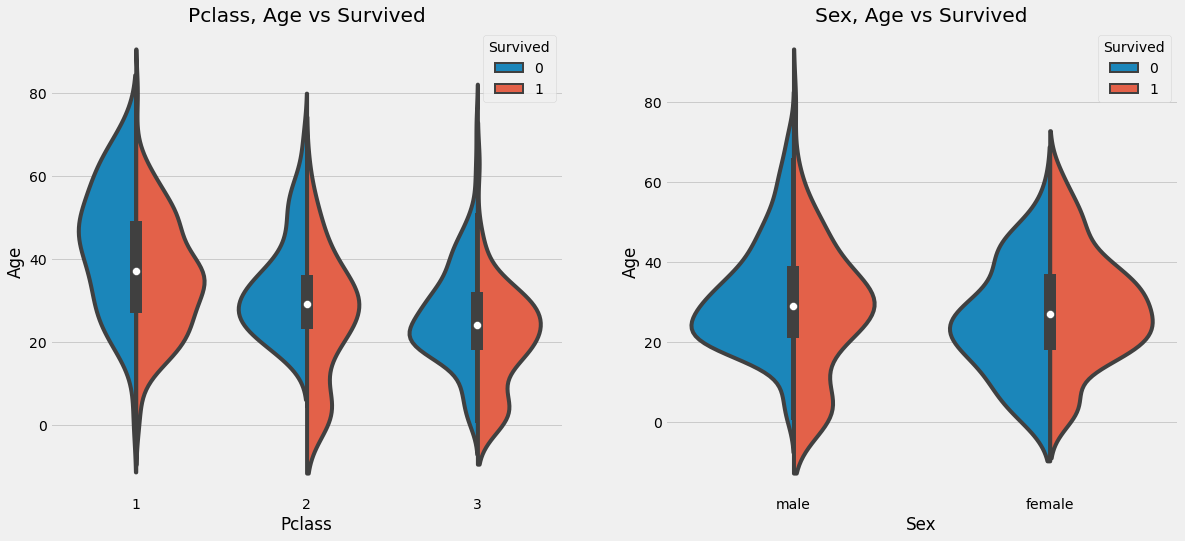

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot("Pclass","Age",hue = 'Survived',data=data,split=True,ax=ax[0])
ax[0].set_title("Pclass, Age vs Survived")
sns.violinplot("Sex","Age",hue='Survived',data = data,split=True,ax=ax[1])
ax[1].set_title("Sex, Age vs Survived")
plt.show()


Figure 4 shows that the number of children increases with the increase in the passenger class (see Pclass 2 and Pclass 3). Also, as the male age increases, the chances of survival decreases.

#Data Pre-processing: Filling in the missing values for the "Age" category (177 rows).

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age column has 177 rows with null values. We need to fill these rows withthe values for the age category. 



We will try to make use of the name feature (e.g., Mr., Mrs., Miss, etc.) in order to extrapolate the mean of the passenger's missing age variable. We determine the mean age for the various name categories (e.g., Mr., Mrs., Miss, etc.) and we assign that particular mean age to the missing age value of the passenger who belongs to that particular name category.

In [ ]:
#We use Regex feature to extract the string name feature from the name category.
#We then add it to a new data column titled "Initial".

data['Initial'] = 0  
for i in data:
  data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.') 


In [ ]:
#We now have a new data column "Initial" that shows the passenger's name title.
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
#Check for all name titles in the data frame.

pd.crosstab(data['Initial'],data['Sex'])


Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
#Replace current titles with new titles

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [ ]:
pd.crosstab(data['Initial'],data['Sex'])

Sex,female,male
Initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#Fill null values for the 'Age' category
We check for 2 conditions: first "Age" is null and second, we check for the name initial (e.g., "Mr"). If the age is null and the name initial is "Mr", then we replace the null age value with mean age of "Mr" which is '33'.

In [ ]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age']=46


In [ ]:
#We now verify that there are no more missing values in the 'Age' category

data['Age'].isnull().sum()

0

#We now check the age distribution of non-survived passengers vs the age distribution of passengers who survived.


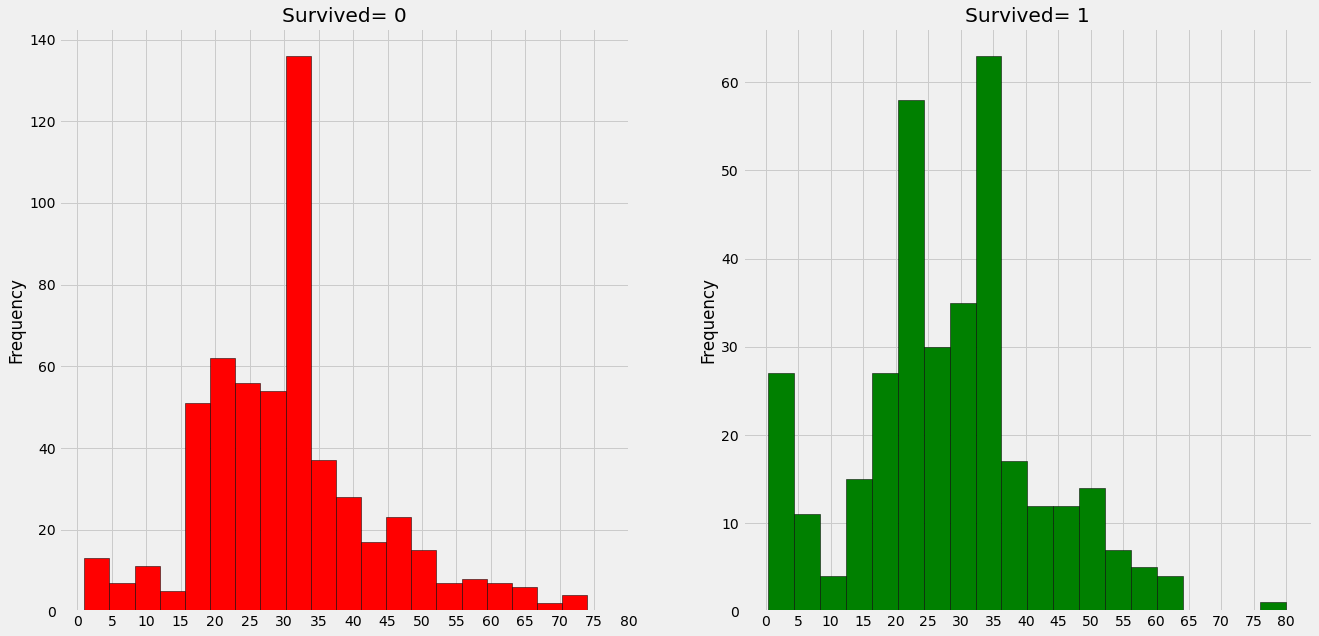

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Figure 5 shows that a significant amount of toddlers (under the age of 5) were saved. This possibly indicates that there was a policy of "Women and Children first into the lifeboat". Also, elderly passengers (age 75-80) were also prioritized. Figure 5 also shows that the maximum death occurred between the age of 30 to 40 years.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


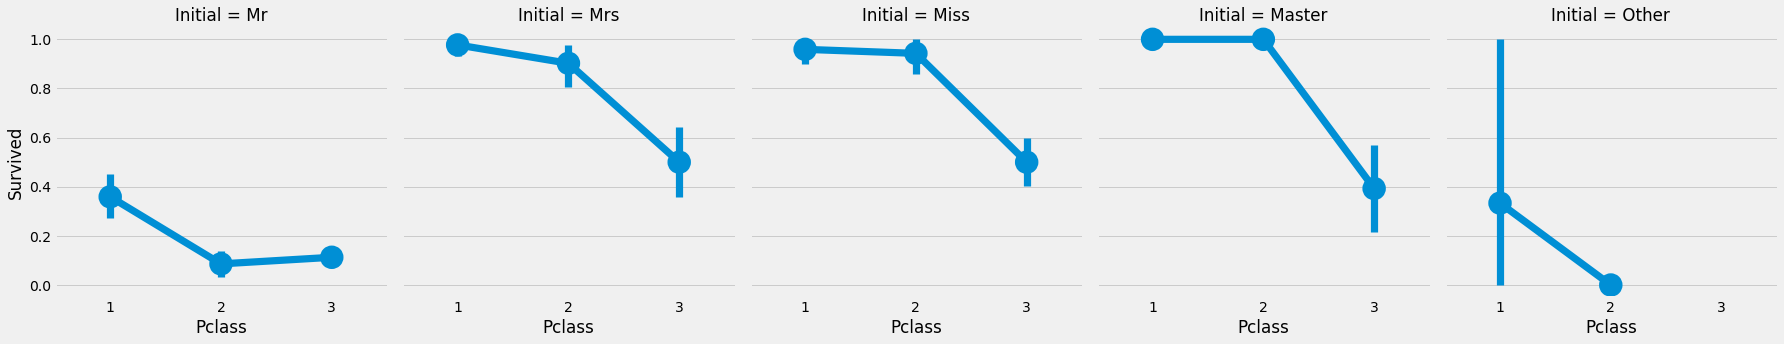

In [ ]:
sns.factorplot('Pclass','Survived',col='Initial', data=data)


Figure 6 shows that the Miss, Mrs and Master categories had the highest chances of survival irrespective of their passenger class category.

#Port of Embarcation ("Embarked") Category - Nominal Data

In [ ]:
pd.crosstab([data['Embarked'],data['Pclass']], [data['Sex'],data['Survived']], margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


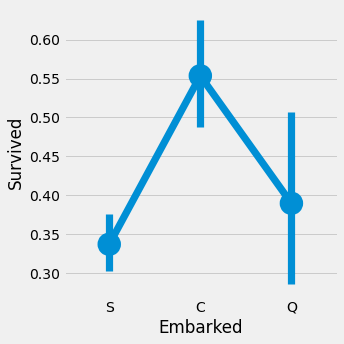

In [ ]:
sns.factorplot("Embarked","Survived",data = data)
plt.show()


Figure 7 shows that the chances of survival were the highest for passengers who boarded at Port C (55% survival), whereas passengers who boarded at Port S had the lowest odds of survival (35% survival).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

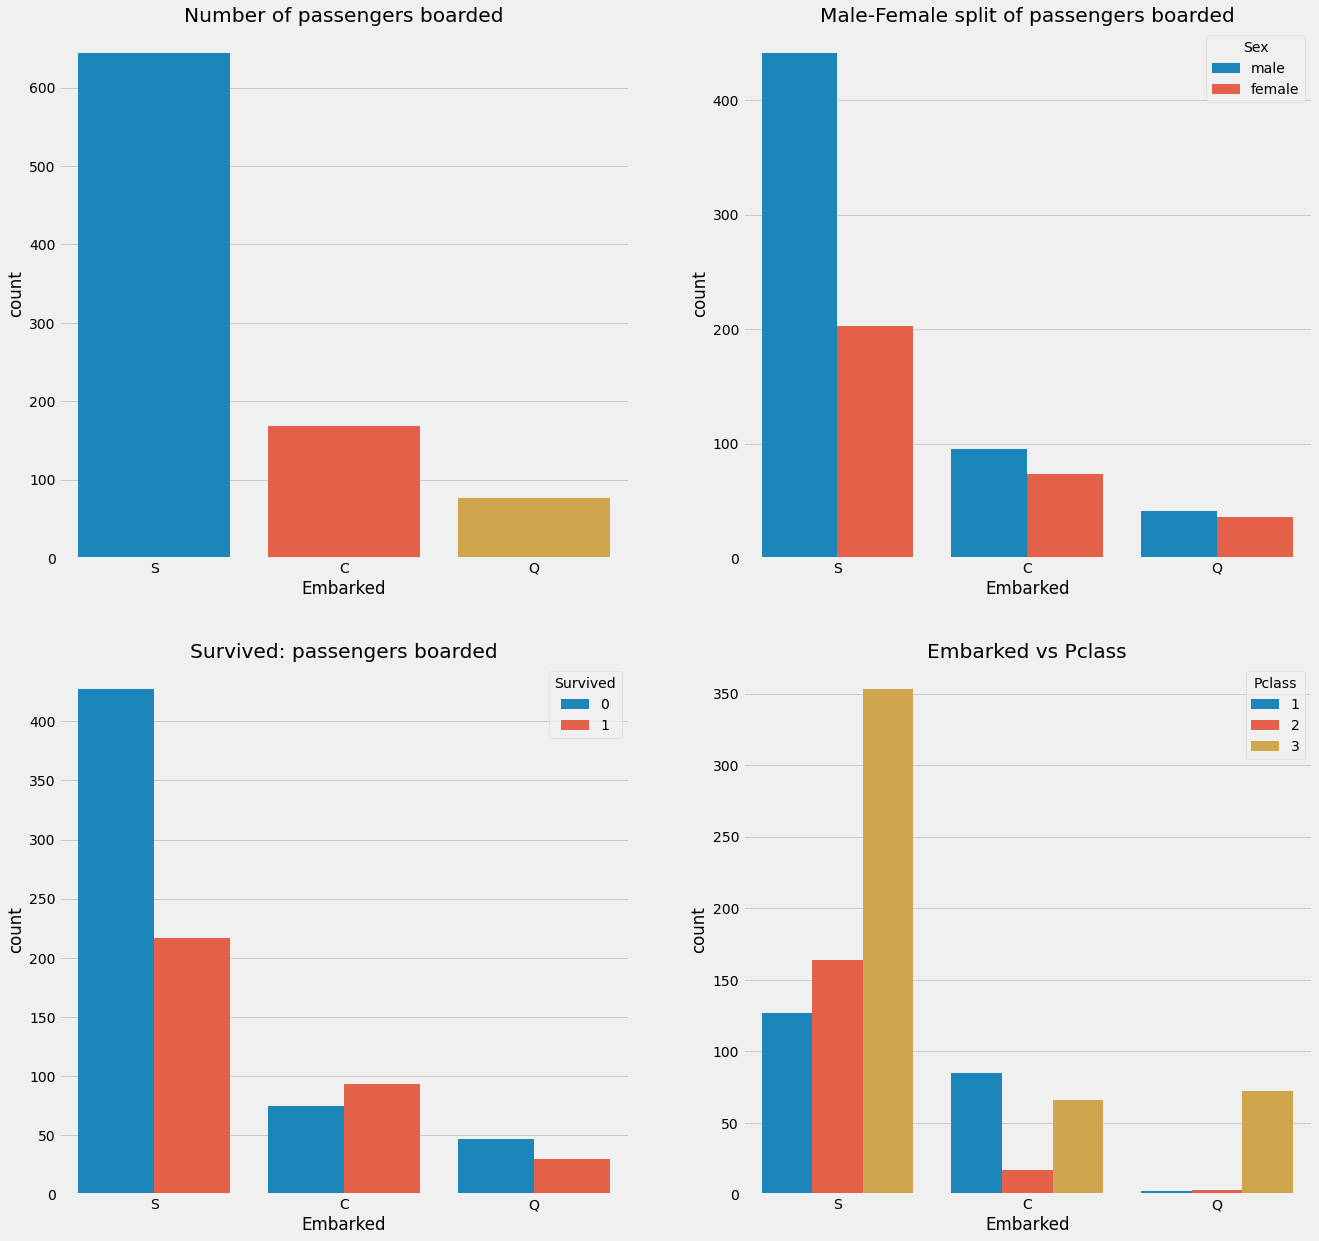

In [ ]:
f, ax = plt.subplots(2,2,figsize=(20,20))
sns.countplot("Embarked",data = data, ax = ax[0,0])
ax[0,0].set_title("Number of passengers boarded")

sns.countplot("Embarked",hue = 'Sex',data = data, ax = ax[0,1])
ax[0,1].set_title("Male-Female split of passengers boarded")

sns.countplot("Embarked",hue = 'Survived',data = data, ax = ax[1,0])
ax[1,0].set_title("Survived: passengers boarded")

sns.countplot("Embarked",hue = 'Pclass',data = data, ax = ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


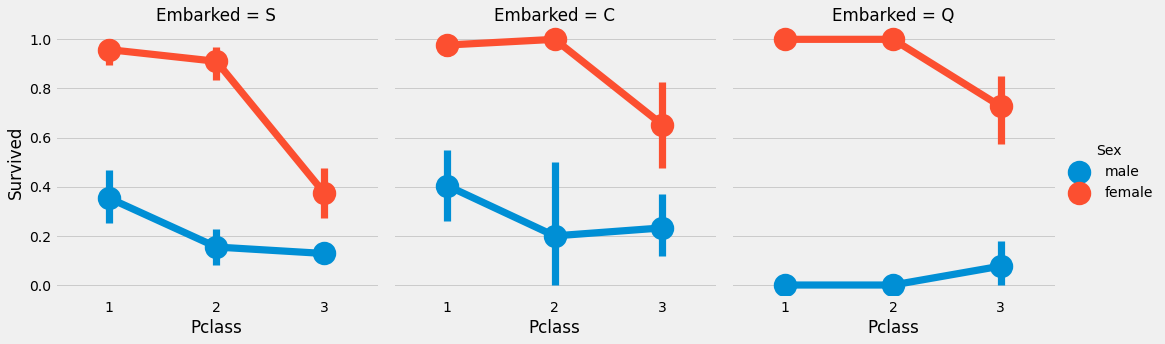

In [ ]:
sns.factorplot('Pclass','Survived', hue='Sex',col='Embarked',data=data)
plt.show()

In [ ]:
data['Embarked'].isna().sum()


2

In [ ]:
#Since most passengers boarded at Port S (that is the mode of 'Embarked' category), we can fill the two empty rows with "S".

data['Embarked'].fillna('S',inplace=True)


In [ ]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

In [ ]:
data['Embarked'].isna().sum()


0

#SibSp Category - No. of siblings accompanied by Family members

In [ ]:
data['SibSp'].unique()


array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
pd.crosstab(data['SibSp'],data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8

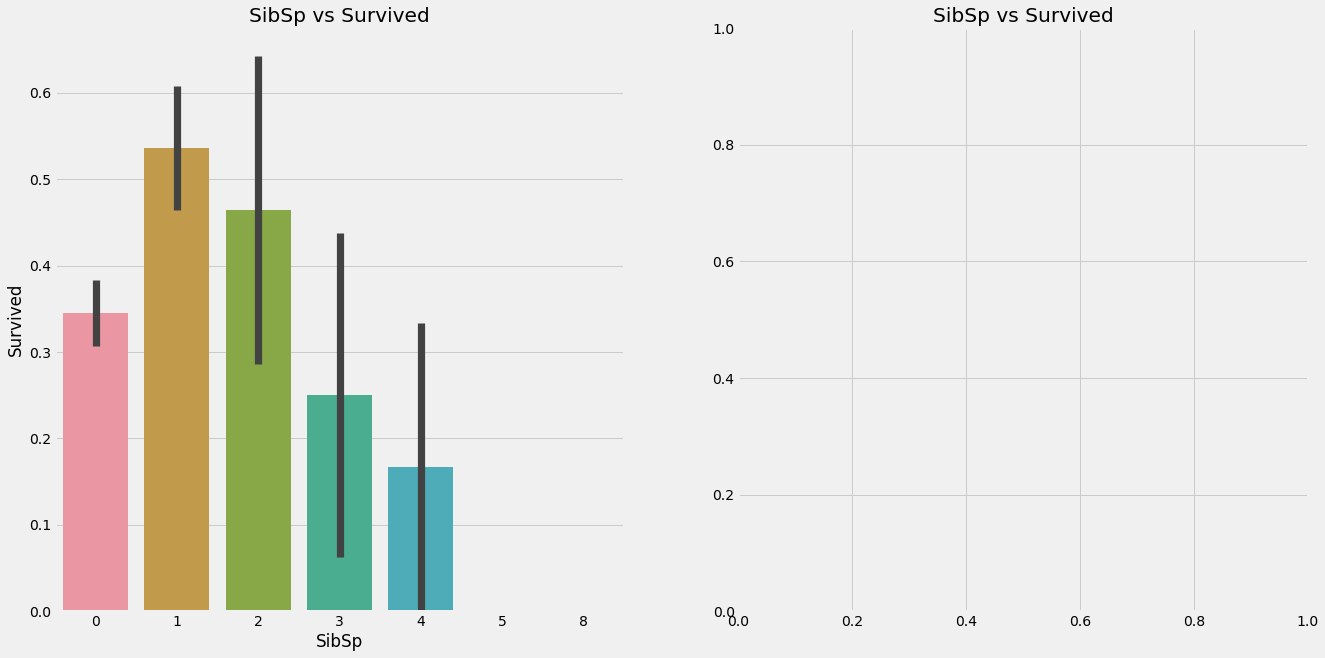

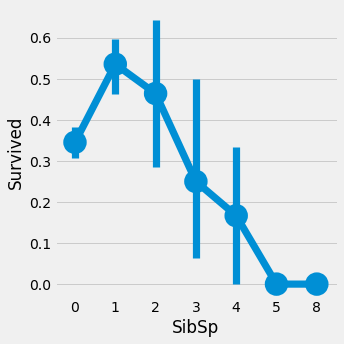

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()


# Fare Category - Continous Value

In [ ]:
data['Fare'].max(), data['Fare'].min(), data['Fare'].mean()


(512.3292, 0.0, 32.204207968574636)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Fares in Pclass 3')

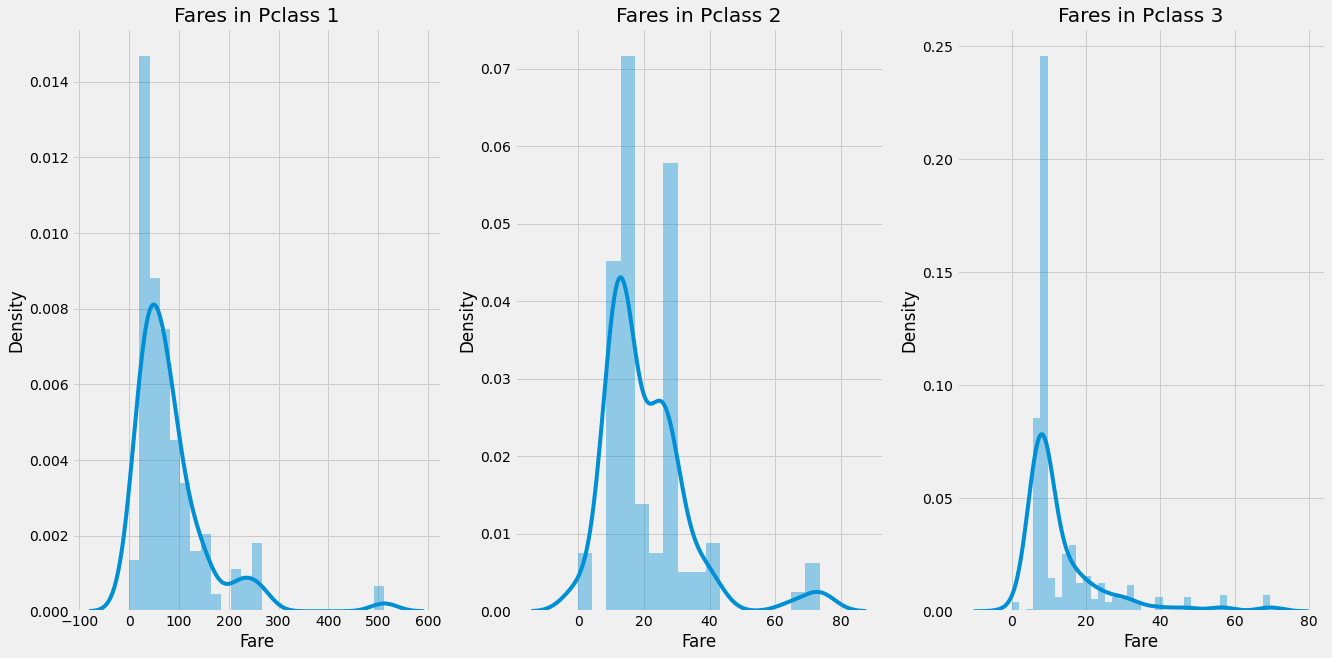

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,10))
sns.distplot(data[data['Pclass']==1]['Fare'],ax=ax[0])
sns.distplot(data[data['Pclass']==2]['Fare'],ax=ax[1])
sns.distplot(data[data['Pclass']==3]['Fare'],ax=ax[2])
ax[0].set_title("Fares in Pclass 1")
ax[1].set_title("Fares in Pclass 2")
ax[2].set_title("Fares in Pclass 3")


# Summary of Results

# Sex (Gender): Women had a better chance of survival than men.
# Pclass: Class 1 > Class 2 > Class 3
# Age: children between age 5 to 10 had a higher chance of survival.
# Age: Most passengers between the age of 15 to 35 did not survive.
# Age: as the age increases, the survival chances also decreases. We see the same pattern irrespective of the ticket (Pclass) that the passenger has purchased.
# Embarked: C port had the highest survival rate because most passengers who boarded belonged to Pclass 1.
# Embarked: S port had the lowest survival rate because most passengers who boarded belonged to Pclass 3.

# Correlation

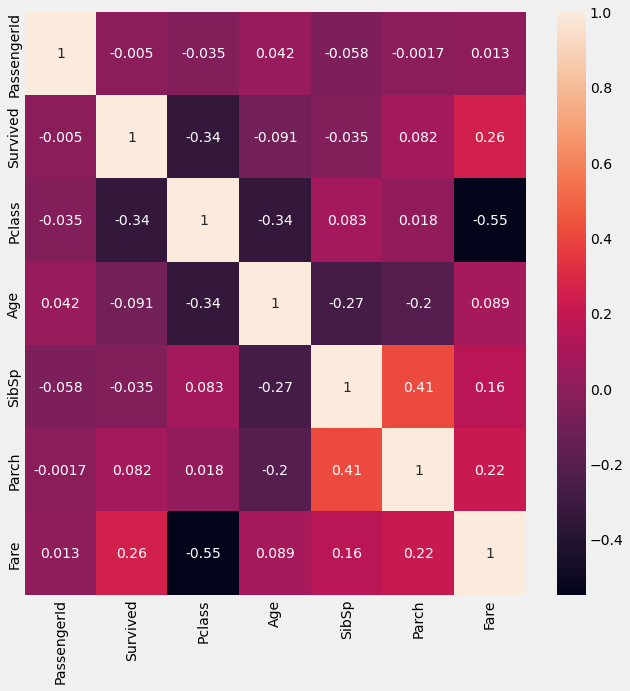

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)
plt.show()


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Pre-processing: Converting a continous variable (Age) to a categorical variable. This makes it possible to do binning on the age categorical variable.

In [ ]:
#Create a new column: 'Age_cat'
data.loc[data['Age']<=16, 'Age_cat'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_cat'] = 1
data.loc[(data['Age']>32) & (data['Age']<=50), 'Age_cat'] = 2
data.loc[(data['Age']>50) & (data['Age']<=70), 'Age_cat'] = 3
data.loc[data['Age']>70, 'Age_cat'] = 4

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2.0


In [ ]:
data['Age_cat'].value_counts()


1.0    382
2.0    341
0.0    104
3.0     59
4.0      5
Name: Age_cat, dtype: int64

#Create a factor plot to understand the effect of age on survival

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


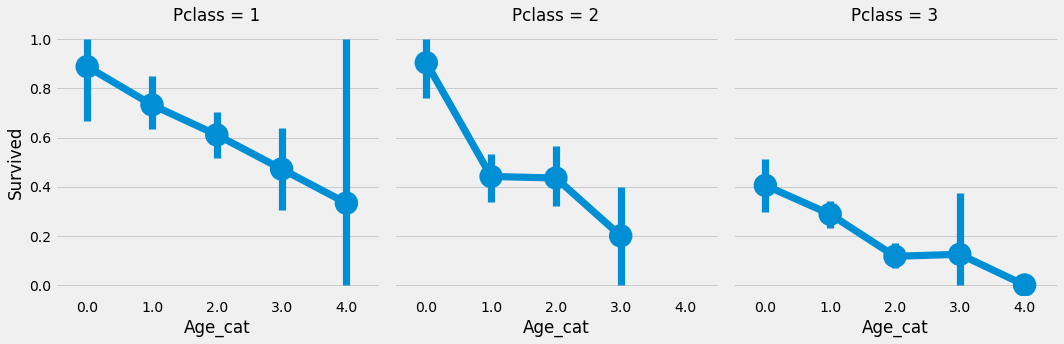

In [ ]:
sns.factorplot('Age_cat', 'Survived', data=data, col='Pclass')


# Figure 8 shows that as the age increases, the survival chances also decreases. We see the same pattern irrespective of the ticket (Pclass) that the passenger has purchased.
